<a href="https://colab.research.google.com/github/Nicordaro/Project_MLDL/blob/master/plotter_mean_std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Functions space**
 
---

In [0]:
def mean_std(el1, el2, el3):
  mean = (el1+el2+el3)/3
  import statistics
  std = statistics.stdev([el1, el2, el3])
  return mean, std

def calc(list1, list2, list3):
  means=[]
  stds=[]
  for el1, el2, el3 in zip(list1, list2, list3):
    mean, std = mean_std(el1, el2, el3)
    means.append(mean)
    stds.append(std)
  return means, stds

In [0]:
import numpy as np
import matplotlib.pyplot as plt
def accuracy_plot(accuracies, devs):
  ### FOR MEAN STD PLOT https://stackoverflow.com/questions/22481854/plot-mean-and-standard-deviation

  fig, ax = plt.subplots(figsize=(20,19), facecolor='white')

  plt.rc('font', size=20)

  marker_style = dict(linestyle='-', marker='o',
                    markersize=.5, markerfacecoloralt='tab:red')

  means = list(np.around(np.array(accuracies),3))
  stds = list(np.around(np.array(devs),3))
  for i, (mean, dev) in enumerate(zip(means, stds)):
    label = str(mean)+' ± '+str(dev)
    plt.annotate(label, # this is the text
                 ((i+1)*10, mean), 
                 textcoords="offset points", # how to position the text 
                 xytext=(-3,0),
                 ha='right', size=13) # distance from text to points (x,y)
  x = np.array((np.arange(1,11)))*10
  plt.errorbar(x, means, stds, fmt='-o', linewidth=3, elinewidth=1, label = "accuracy", c='orange', ecolor='black', capsize= 5, barsabove=True, **marker_style)
  
  ax.set_ylabel("Accuracy")
  ax.set_xlabel("Classes")
  ax.minorticks_on()
  plt.title("Accuracies(mean ± std) obtained with finetuning of a ResNet network")
  plt.yticks(np.arange(0, 1.1, .1))
  plt.xticks(np.arange(0, 110, 10))
  plt.grid(axis='y',which='major', linestyle='-', linewidth='0.5', color='black') 
  plt.grid(axis='y',which='minor', linestyle=':', linewidth='0.5', color='grey')
  
  plt.savefig('test.png', format='png', dpi=300)
  plt.show()

**Variables definition**

---


Finetuning

In [0]:
list1=[0.904, 0.4585, 0.30566666666666664, 0.22925, 0.1868, 0.15566666666666668, 0.13342857142857142, 0.11675, 0.10377777777777777, 0.0942]
list2=[0.84, 0.455, 0.30666666666666664, 0.23, 0.184, 0.15333333333333332, 0.13142857142857142, 0.116125, 0.10633333333333334, 0.0957]
list3=[0.886, 0.443, 0.31333333333333335, 0.235, 0.188, 0.15666666666666668, 0.13428571428571429, 0.1175, 0.10444444444444445, 0.094]

LwF

In [0]:
# list1=[0.883, 0.637, 0.549, 0.479, 0.4284, 0.3765, 0.3515714285714286, 0.339125, 0.25633333333333336, 0.1901]
# list2=[0.859, 0.66, 0.5463333333333333, 0.476, 0.4188, 0.399, 0.3271428571428571, 0.291, 0.27355555555555555, 0.2012]
# list3=[0.813, 0.6165, 0.564, 0.504, 0.461, 0.43983333333333335, 0.39057142857142857, 0.365625, 0.3403333333333333, 0.2905]

*Calculations*

In [0]:
means, stds = calc(list1, list2, list3)

*Plot*

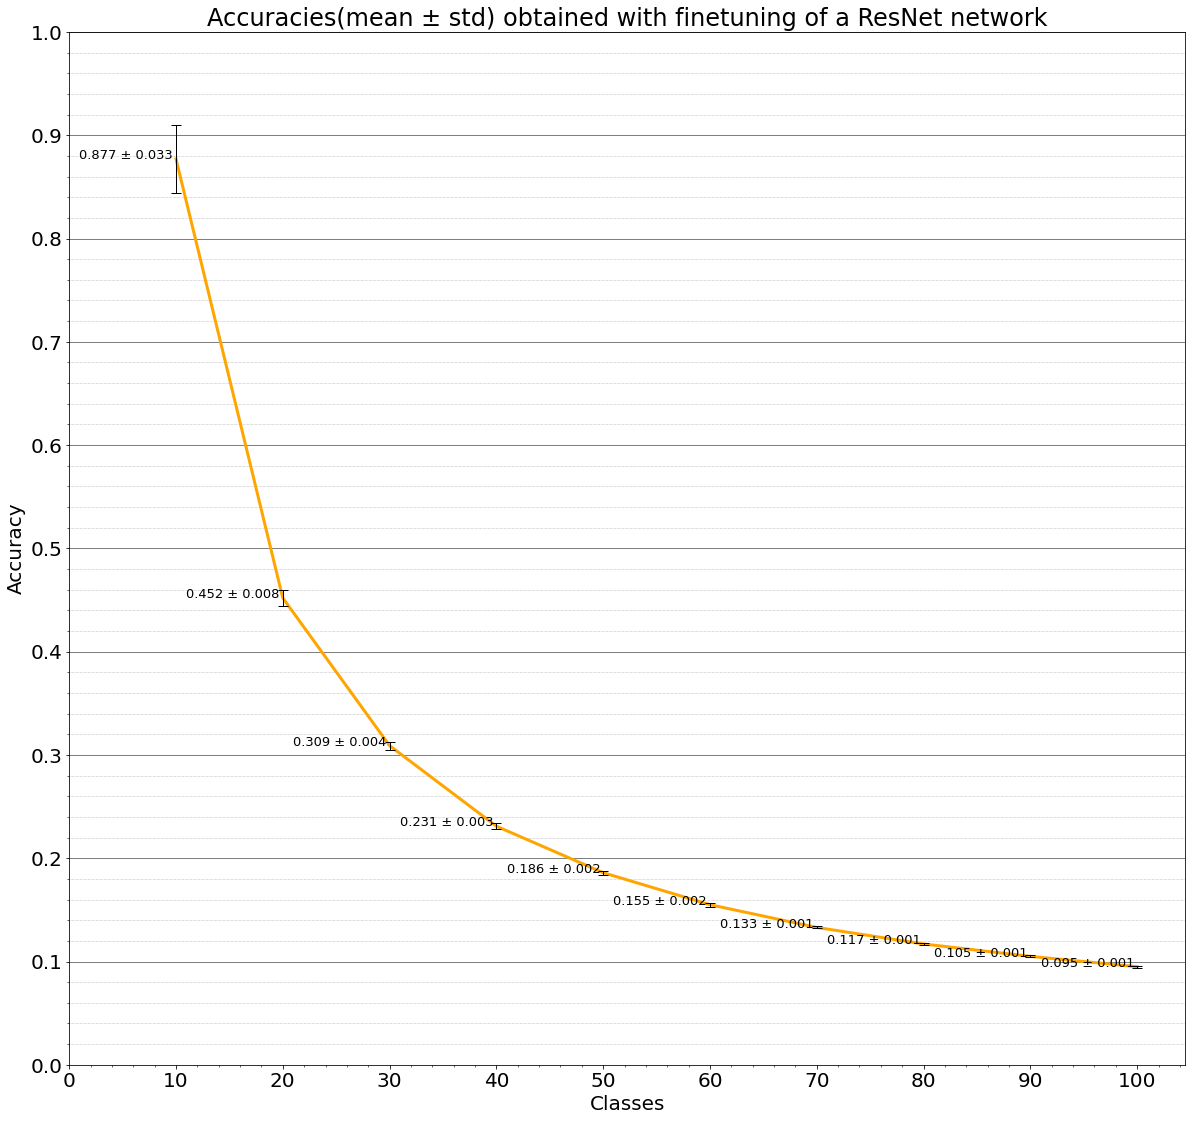

In [16]:
accuracy_plot(means, stds)